In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
experiment = "RNAseq_abundances_adjusted_combat_inmose"
comparison = 'young.vs.old'

In [3]:
adata = pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
adata

/tmp/ipykernel_79805/4180410568.py:1: DtypeWarning: Columns (34508) have mixed types. Specify dtype option on import or set low_memory=False.
  adata = pd.read_csv(f'/home/amore/work/data/{experiment}.csv')


,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Age,Experiment,Sex,Status
0,SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,...,0,0,0,0,2773,0,91.0,GSE167186,NaN,Sarcopenia
1,SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,...,0,0,0,0,1328,0,86.0,GSE167186,male,Healthy
2,SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,...,0,0,0,0,1,0,69.0,GSE167186,male,Healthy
3,SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,...,0,0,0,0,1614,0,83.0,GSE167186,NaN,Sarcopenia
4,SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,...,0,0,0,0,795,0,71.0,GSE167186,NaN,UNCLASSIFIED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,...,3582648,0,0,0,0,5351828,27.5,GSE60590,male,trained
266,SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,...,0,1956002,0,0,0,0,27.5,GSE60590,male,untrained
267,SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,...,0,824055,0,1040940,12712840,5952181,27.5,GSE60590,male,trained
268,SRR1555213,35885217,1428536,44248179,19331,2896856,110080,73026055,17457124,30839652,...,0,873096,0,0,0,0,27.5,GSE60590,male,trained


In [4]:
adata = adata.set_index('Sample')
age_series = adata['Age']
adata

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Age,Experiment,Sex,Status
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,0,0,0,0,2773,0,91.0,GSE167186,NaN,Sarcopenia
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,0,0,0,0,1328,0,86.0,GSE167186,male,Healthy
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,0,0,0,0,1,0,69.0,GSE167186,male,Healthy
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,0,0,0,0,1614,0,83.0,GSE167186,NaN,Sarcopenia
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,0,0,0,0,795,0,71.0,GSE167186,NaN,UNCLASSIFIED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,951798,...,3582648,0,0,0,0,5351828,27.5,GSE60590,male,trained
SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,2233983,...,0,1956002,0,0,0,0,27.5,GSE60590,male,untrained
SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,147215871,...,0,824055,0,1040940,12712840,5952181,27.5,GSE60590,male,trained


In [23]:
len(adata[(adata['Age']<65) & (adata['Age']<35)])

91

In [7]:
adata['Experiment'].unique()

array(['GSE167186', 'GSE129643', 'GSE164471', 'GSE157585', 'GSE152558',
       'GSE60590'], dtype=object)

In [2]:
adata.describe()

NameError: name 'adata' is not defined

In [6]:
ensembl_names = adata.columns
ensembl_names = ensembl_names.to_list()
ensembl_names[:5]

['ENSG00000000003.14',
 'ENSG00000000005.5',
 'ENSG00000000419.12',
 'ENSG00000000457.13',
 'ENSG00000000460.16']

In [7]:
# Retrieve gene symbols
annot = sc.queries.biomart_annotations("hsapiens",
        ["ensembl_gene_id", "external_gene_name"],
        use_cache=False
    ).set_index("ensembl_gene_id")


In [8]:
ensembl_names = [item for item in ensembl_names if item.split('.')[0] in annot.index]


In [9]:
adata = adata[ensembl_names]
adata

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285446.1,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,0,12741169,0,0,0,0,0,0,2773,0
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,0,10663212,0,0,0,0,0,0,1328,0
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,0,4248288,0,0,0,0,0,0,1,0
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,0,10497182,0,0,0,0,0,0,1614,0
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,0,10506926,0,0,0,0,0,0,795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,951798,...,0,23486240,0,0,0,0,0,0,0,5351828
SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,2233983,...,0,34582470,0,0,0,1956002,0,0,0,0
SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,147215871,...,0,81916604,0,1537700,0,824055,0,1040940,12712840,5952181


In [11]:
ensembl_names = [element.split('.')[0] for element in ensembl_names]


In [12]:
# Assign gene symbols
adata.columns = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]
adata['Age'] = age_series
adata

/tmp/ipykernel_70771/2025391457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata['Age'] = age_series


,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,C4orf36,TUSC2P1,NaN,OR4M2-OT1,H2BK1,OR1Q1BP,NaN,NaN,TBCEL-TECTA,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,12741169,0,0,0,0,0,0,2773,0,91.0
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,10663212,0,0,0,0,0,0,1328,0,86.0
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,4248288,0,0,0,0,0,0,1,0,69.0
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,10497182,0,0,0,0,0,0,1614,0,83.0
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,10506926,0,0,0,0,0,0,795,0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,951798,...,23486240,0,0,0,0,0,0,0,5351828,27.5
SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,2233983,...,34582470,0,0,0,1956002,0,0,0,0,27.5
SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,147215871,...,81916604,0,1537700,0,824055,0,1040940,12712840,5952181,27.5


In [13]:
adata.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol_expression.csv')

In [122]:
adata=pd.read_csv(f'/home/amore/work/data/{experiment}_gene_symbol_expression.csv')

In [123]:
adata = adata.set_index('Sample')
adata=adata.astype(int)
adata

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,C4orf36.1,TUSC2P1,Unnamed: 34327,OR4M2-OT1,H2BK1,OR1Q1BP,Unnamed: 34331,Unnamed: 34332,TBCEL-TECTA,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,12741169,0,0,0,0,0,0,2773,0,91
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,10663212,0,0,0,0,0,0,1328,0,86
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,4248288,0,0,0,0,0,0,1,0,69
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,10497182,0,0,0,0,0,0,1614,0,83
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,10506926,0,0,0,0,0,0,795,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,951798,...,23486240,0,0,0,0,0,0,0,5351828,27
SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,2233983,...,34582470,0,0,0,1956002,0,0,0,0,27
SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,147215871,...,81916604,0,1537700,0,824055,0,1040940,12712840,5952181,27


In [124]:
adata.isnull().sum().any()

False

In [126]:
adata.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol_expression_clean.csv', index=True, header=True)

In [152]:
ages=adata['Age']
adata=adata.drop('Age',axis=1)
andata=AnnData(adata.to_numpy(), obs=pd.DataFrame(ages))
andata.obs_names = adata.index
andata.var_names = adata.columns
andata

AnnData object with n_obs × n_vars = 270 × 34333
    obs: 'Age'

In [153]:
pd.DataFrame(andata.X).isnull().sum().any()

False

In [154]:
adata = andata #AnnData(adata.to_numpy(), dtype=np.int32)
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 270 × 34333
    obs: 'Age'

In [21]:
pd.DataFrame(adata.X).min().min()

0

In [22]:
adata.obs.index

Index(['SRR13758984', 'SRR13758985', 'SRR13758986', 'SRR13758987',
       'SRR13758988', 'SRR13758989', 'SRR13758990', 'SRR13758991',
       'SRR13758992', 'SRR13758993',
       ...
       'SRR1555205', 'SRR1555206', 'SRR1555207', 'SRR1555208', 'SRR1555209',
       'SRR1555210', 'SRR1555211', 'SRR1555212', 'SRR1555213', 'SRR1555214'],
      dtype='object', name='Sample', length=270)

In [155]:
# Process treatment information
adata.obs['condition'] = age_series.apply(lambda age: 'young' if age < 35 else ('old' if age >= 65 else 'middle'))

# Visualize metadata
adata.obs

,Age,condition
Sample,,
SRR13758984,91,old
SRR13758985,86,old
SRR13758986,69,old
SRR13758987,83,old
SRR13758988,71,old
...,...,...
SRR1555210,27,young
SRR1555211,27,young
SRR1555212,27,young


In [24]:
pd.DataFrame(adata.X).isna().sum().any()#.isnull().sum().sum()

False

In [25]:
#dc.plot_filter_by_expr(adata, group='condition')


ValueError: cannot convert float NaN to integer

In [156]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group='condition', min_count=10, min_total_count=15, large_n=1, min_prop=1)

# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 270 × 25378
    obs: 'Age', 'condition'

In [27]:
adata.var

""
TSPAN6
TNMD
DPM1
SCYL3
FIRRM
...
C4orf36.1
Unnamed: 34327
H2BK1
Unnamed: 34332


In [28]:
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

In [29]:
# Build DESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    inference=inference,
)

In [30]:
dds.deseq2()

Fitting size factors...
... done in 0.16 seconds.

Fitting dispersions...
... done in 27.72 seconds.

Fitting dispersion trend curve...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 30.11 seconds.

Fitting LFCs...
... done in 28.72 seconds.

Replacing 6537 outlier genes.

Fitting dispersions...
... done in 5.85 seconds.

Fitting MAP dispersions...
... done in 6.56 seconds.

Fitting LFCs...
... done in 9.52 seconds.



In [95]:
# Extract contrast between young and old
comparison = 'young.vs.old'
stat_res = DeseqStats(
    dds,
    contrast=["condition", 'young', 'old'],
    inference=inference
)
stat_res.summary()
results_df = stat_res.results_df
results_df.to_csv(f'/home/amore/work/data/{experiment}_{comparison}_DDS.csv', header=True)

Running Wald tests...
... done in 1.61 seconds.



Log2 fold change & Wald test p-value: condition young vs old
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6          6.652061e+07       -0.039065  0.104623 -0.373394  0.708855   
TNMD            1.376112e+05       -0.426688  1.395668 -0.305723  0.759815   
DPM1            9.614235e+07       -0.145930  0.158111 -0.922960  0.356028   
SCYL3           1.268802e+07       -1.493229  0.706095 -2.114769  0.034450   
FIRRM           3.481744e+07       -1.009579  0.447366 -2.256718  0.024026   
...                      ...             ...       ...       ...       ...   
C4orf36.1       5.664924e+07       -0.351695  0.220923 -1.591932  0.111400   
Unnamed: 34327  5.890034e+05       -0.088741  1.216048 -0.072975  0.941826   
H2BK1           9.477206e+05        0.010106  1.014972  0.009957  0.992056   
Unnamed: 34332  5.902246e+06        1.001606  0.743051  1.347965  0.177670   
TBCEL-TECTA     3.499101e+06        0.300849  0.613849  0.490102  0.624061   

  

Running Wald tests...
... done in 4.37 seconds.



Log2 fold change & Wald test p-value: condition young vs old
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6          6.652061e+07       -0.039065  0.104623 -0.373394  0.708855   
TNMD            1.376112e+05       -0.426688  1.395668 -0.305723  0.759815   
DPM1            9.614235e+07       -0.145930  0.158111 -0.922960  0.356028   
SCYL3           1.268802e+07       -1.493229  0.706095 -2.114769  0.034450   
FIRRM           3.481744e+07       -1.009579  0.447366 -2.256718  0.024026   
...                      ...             ...       ...       ...       ...   
C4orf36.1       5.664924e+07       -0.351695  0.220923 -1.591932  0.111400   
Unnamed: 34327  5.890034e+05       -0.088741  1.216048 -0.072975  0.941826   
H2BK1           9.477206e+05        0.010106  1.014972  0.009957  0.992056   
Unnamed: 34332  5.902246e+06        1.001606  0.743051  1.347965  0.177670   
TBCEL-TECTA     3.499101e+06        0.300849  0.613849  0.490102  0.624061   

  

In [33]:

results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,6.652061e+07,-0.039065,0.104623,-0.373394,0.708855,0.907432
TNMD,1.376112e+05,-0.426688,1.395668,-0.305723,0.759815,0.924157
DPM1,9.614235e+07,-0.145930,0.158111,-0.922960,0.356028,0.693475
SCYL3,1.268802e+07,-1.493229,0.706095,-2.114769,0.034450,0.158123
FIRRM,3.481744e+07,-1.009579,0.447366,-2.256718,0.024026,0.123501
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.351695,0.220923,-1.591932,0.111400,0.346605
Unnamed: 34327,5.890034e+05,-0.088741,1.216048,-0.072975,0.941826,0.982119
H2BK1,9.477206e+05,0.010106,1.014972,0.009957,0.992056,0.997164
Unnamed: 34332,5.902246e+06,1.001606,0.743051,1.347965,0.177670,0.466165


In [34]:
results_df[(abs(results_df['log2FoldChange'])>2)&(results_df['padj']<0.01)].sort_values('log2FoldChange')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ZNF622P1,6.264243e+04,-26.741441,4.153522,-6.438257,1.208536e-10,8.615234e-09
SGCZ,1.838463e+04,-19.817974,1.334669,-14.848602,7.103446e-50,1.201808e-46
RIMKLBP2,5.082031e+03,-19.692881,1.412759,-13.939309,3.654633e-44,4.637364e-41
EIF1AXP1,2.076085e+06,-16.950502,1.057212,-16.033207,7.491532e-58,2.053085e-54
RPL21P72,4.560781e+05,-16.905359,1.007775,-16.774936,3.722570e-63,1.349591e-59
...,...,...,...,...,...,...
RSPO1,2.378095e+04,10.561955,0.977382,10.806374,3.211129e-27,1.771566e-24
Unnamed: 31262,1.959940e+04,11.580810,1.428281,8.108213,5.136946e-16,8.250976e-14
MTCO1P24,8.601578e+04,12.880724,1.098711,11.723488,9.661030e-32,7.211107e-29
KL,2.233075e+06,14.022549,0.944673,14.843816,7.628968e-50,1.210050e-46


In [94]:
# Extract contrast between young and middle age
comparison = 'young.vs.middle'
stat_res = DeseqStats(
    dds,
    contrast=["condition", 'young', 'middle'],
    inference=inference
)
stat_res.summary()
results_df = stat_res.results_df
results_df
results_df.to_csv(f'/home/amore/work/data/{experiment}_{comparison}_DDS.csv', header=True)

Running Wald tests...
... done in 1.64 seconds.



Log2 fold change & Wald test p-value: condition young vs middle
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6          6.652061e+07        0.096567  0.144318  0.669127  0.503414   
TNMD            1.376112e+05        3.782040  1.925196  1.964496  0.049473   
DPM1            9.614235e+07       -0.031938  0.218100 -0.146436  0.883578   
SCYL3           1.268802e+07       -0.448950  0.973996 -0.460937  0.644844   
FIRRM           3.481744e+07        0.289337  0.617102  0.468863  0.639167   
...                      ...             ...       ...       ...       ...   
C4orf36.1       5.664924e+07       -0.081090  0.304744 -0.266091  0.790169   
Unnamed: 34327  5.890034e+05       -0.832981  1.677427 -0.496583  0.619483   
H2BK1           9.477206e+05       -0.497208  1.400063 -0.355133  0.722490   
Unnamed: 34332  5.902246e+06        2.688554  1.024972  2.623050  0.008715   
TBCEL-TECTA     3.499101e+06       -1.429715  0.846750 -1.688473  0.091321   


In [37]:
results_df[(abs(results_df['log2FoldChange'])>7)&(results_df['padj']<0.01)].sort_values('log2FoldChange')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ZNF622P1,6.264243e+04,-20.674450,4.253291,-4.860813,1.169049e-06,4.058566e-05
WFDC11,2.727486e+05,-16.291857,1.169068,-13.935766,3.840598e-44,1.082963e-40
PRSS37,1.643864e+04,-15.630219,1.018022,-15.353514,3.355094e-53,1.419093e-49
GLYATL1,1.495215e+05,-14.925023,1.220618,-12.227431,2.218433e-34,2.085163e-31
C1orf87,1.284620e+04,-13.293753,1.240866,-10.713285,8.817656e-27,5.238876e-24
...,...,...,...,...,...,...
TMEM187,1.132096e+06,25.179560,1.428888,17.621790,1.676167e-69,4.253776e-65
Unnamed: 33813,3.666245e+06,26.968565,1.746134,15.444726,8.187536e-54,4.155666e-50
GIMAP1-GIMAP5,1.205429e+07,27.410187,1.590552,17.233129,1.498241e-66,1.901118e-62
Unnamed: 32081,8.649072e+05,27.551826,2.055510,13.403890,5.737546e-41,1.040053e-37


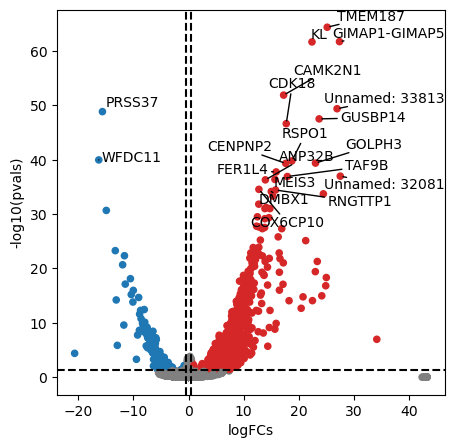

In [38]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    figsize=(5, 5)
)

In [39]:
# Extract contrast between middle age and old
comparison="MO"
stat_res = DeseqStats(
    dds,
    contrast=["condition", 'middle', 'old'],
    inference=inference
)
stat_res.summary()
results_df = stat_res.results_df
results_df
results_df.to_csv(f'/home/amore/work/data/{experiment}_{comparison}_DDS.csv', header=True)

Running Wald tests...
... done in 2.74 seconds.



Log2 fold change & Wald test p-value: condition middle vs old
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6          6.652061e+07       -0.135632  0.136452 -0.993992  0.320227   
TNMD            1.376112e+05       -4.208728  1.820271 -2.312143  0.020770   
DPM1            9.614235e+07       -0.113993  0.206214 -0.552788  0.580408   
SCYL3           1.268802e+07       -1.044279  0.920912 -1.133961  0.256811   
FIRRM           3.481744e+07       -1.298916  0.583469 -2.226193  0.026001   
...                      ...             ...       ...       ...       ...   
C4orf36.1       5.664924e+07       -0.270605  0.288135 -0.939160  0.347649   
Unnamed: 34327  5.890034e+05        0.744240  1.586006  0.469254  0.638888   
H2BK1           9.477206e+05        0.507314  1.323758  0.383238  0.701544   
Unnamed: 34332  5.902246e+06       -1.686947  0.969110 -1.740717  0.081733   
TBCEL-TECTA     3.499101e+06        1.730563  0.800602  2.161579  0.030651   

 

In [40]:
results_df[(abs(results_df['log2FoldChange'])>7)&(results_df['padj']<0.01)].sort_values('log2FoldChange')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Unnamed: 31302,6.421005e+06,-34.407073,5.652896,-6.086628,1.153136e-09,4.885523e-08
GIMAP1-GIMAP5,1.205429e+07,-27.155545,1.514770,-17.927173,7.236740e-72,9.182699e-68
TMEM187,1.132096e+06,-26.828430,1.370715,-19.572574,2.649545e-85,6.724016e-81
Unnamed: 33813,3.666245e+06,-26.823052,1.667707,-16.083791,3.314586e-58,1.201680e-54
Unnamed: 32081,8.649072e+05,-26.677513,1.995700,-13.367497,9.363873e-41,1.250718e-37
...,...,...,...,...,...,...
NDUFB4,8.215766e+05,9.273909,1.028417,9.017655,1.921589e-19,3.340142e-17
GPX7,3.443875e+04,9.379588,0.930069,10.084828,6.447779e-24,2.045397e-21
RPL12P13,3.999909e+04,10.089088,1.585216,6.364488,1.959421e-10,9.435708e-09
MTCO1P24,8.601578e+04,10.115922,1.432533,7.061565,1.646377e-12,1.090907e-10


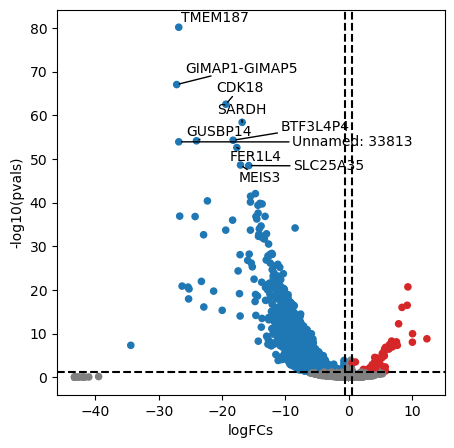

In [41]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [42]:
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,6.652061e+07,-0.135632,0.136452,-0.993992,0.320227,0.606626
TNMD,1.376112e+05,-4.208728,1.820271,-2.312143,0.020770,0.129159
DPM1,9.614235e+07,-0.113993,0.206214,-0.552788,0.580408,0.753857
SCYL3,1.268802e+07,-1.044279,0.920912,-1.133961,0.256811,0.554243
FIRRM,3.481744e+07,-1.298916,0.583469,-2.226193,0.026001,0.152072
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.270605,0.288135,-0.939160,0.347649,0.625383
Unnamed: 34327,5.890034e+05,0.744240,1.586006,0.469254,0.638888,0.789295
H2BK1,9.477206e+05,0.507314,1.323758,0.383238,0.701544,0.826746
Unnamed: 34332,5.902246e+06,-1.686947,0.969110,-1.740717,0.081733,0.312195


In [47]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}_{comparison}_DDS.csv')
results_df = results_df.set_index('Unnamed: 0')
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,6.652061e+07,-0.135632,0.136452,-0.993992,0.320227,0.606626
TNMD,1.376112e+05,-4.208728,1.820271,-2.312143,0.020770,0.129159
DPM1,9.614235e+07,-0.113993,0.206214,-0.552788,0.580408,0.753857
SCYL3,1.268802e+07,-1.044279,0.920912,-1.133961,0.256811,0.554243
FIRRM,3.481744e+07,-1.298916,0.583469,-2.226193,0.026001,0.152072
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.270605,0.288135,-0.939160,0.347649,0.625383
Unnamed: 34327,5.890034e+05,0.744240,1.586006,0.469254,0.638888,0.789295
H2BK1,9.477206e+05,0.507314,1.323758,0.383238,0.701544,0.826746


In [ ]:
#results_df.to_csv(f'/home/amore/work/data/{experiment}_YO_gene_symbol.csv')

In [48]:
def make_index_unique(df):
    # Create a dictionary to keep track of the counts
    counts = {}
    
    def unique_index(index):
        if index in counts:
            counts[index] += 1
            return f"{index}_{counts[index]}"
        else:
            counts[index] = 0
            return index
    
    # Apply the unique_index function to each index value
    new_index = [unique_index(idx) for idx in df.index]
    df.index = new_index


In [96]:
results_df = results_df[results_df.index.notnull()]
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,6.652061e+07,-0.039065,0.104623,-0.373394,0.708855,0.907432
TNMD,1.376112e+05,-0.426688,1.395668,-0.305723,0.759815,0.924157
DPM1,9.614235e+07,-0.145930,0.158111,-0.922960,0.356028,0.693475
SCYL3,1.268802e+07,-1.493229,0.706095,-2.114769,0.034450,0.158123
FIRRM,3.481744e+07,-1.009579,0.447366,-2.256718,0.024026,0.123501
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.351695,0.220923,-1.591932,0.111400,0.346605
Unnamed: 34327,5.890034e+05,-0.088741,1.216048,-0.072975,0.941826,0.982119
H2BK1,9.477206e+05,0.010106,1.014972,0.009957,0.992056,0.997164
Unnamed: 34332,5.902246e+06,1.001606,0.743051,1.347965,0.177670,0.466165


In [50]:

make_index_unique(results_df)

In [97]:
results_df = results_df.dropna()
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,6.652061e+07,-0.039065,0.104623,-0.373394,0.708855,0.907432
TNMD,1.376112e+05,-0.426688,1.395668,-0.305723,0.759815,0.924157
DPM1,9.614235e+07,-0.145930,0.158111,-0.922960,0.356028,0.693475
SCYL3,1.268802e+07,-1.493229,0.706095,-2.114769,0.034450,0.158123
FIRRM,3.481744e+07,-1.009579,0.447366,-2.256718,0.024026,0.123501
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.351695,0.220923,-1.591932,0.111400,0.346605
Unnamed: 34327,5.890034e+05,-0.088741,1.216048,-0.072975,0.941826,0.982119
H2BK1,9.477206e+05,0.010106,1.014972,0.009957,0.992056,0.997164
Unnamed: 34332,5.902246e+06,1.001606,0.743051,1.347965,0.177670,0.466165


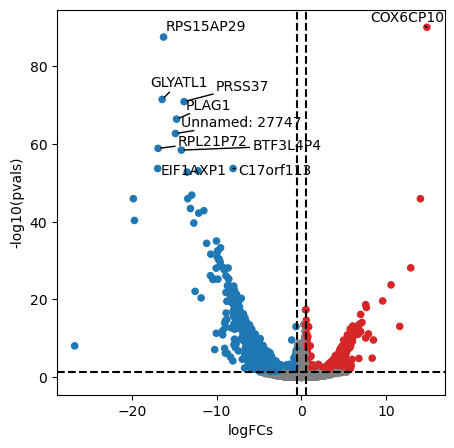

In [98]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [ ]:
mat = results_df[['stat']].T.rename(index={'stat': comparison})
mat

In [139]:
mat.T.to_csv(f'results/mat_stat_{experiment}_{comparison}.csv')

In [40]:
mat = pd.read_csv(f'results/mat_{experiment}_{comparison}.csv', index_col=0)
mat =mat.T
mat

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,Unnamed: 34318,Unnamed: 34319,PDGFRL2P,POLR2J3.1,Unnamed: 34322,C4orf36.1,Unnamed: 34327,H2BK1,Unnamed: 34332,TBCEL-TECTA
young.vs.old,-0.373394,-0.305723,-0.92296,-2.114769,-2.256718,-0.22918,-3.591853,-1.408615,-2.504045,-2.09685,...,-0.061354,-1.754382,0.38343,-0.101156,0.174517,-1.591932,-0.072975,0.009957,1.347965,0.490102


In [24]:
comparison

'young.vs.old'

In [26]:
collectri = dc.get_collectri(organism='human', split_complexes=True)
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
63071,JUN_JUNB,hsa-miR-144,1,23546882
63072,FOSL1_JUN,hsa-miR-144,1,23546882
63073,FOSL1_JUNB,hsa-miR-144,1,23546882
63074,FOS_JUNB,hsa-miR-144,1,23546882


In [141]:
len(collectri['target'].unique())

6692

In [142]:
len(collectri['source'].unique())

1209

In [138]:
collectri[collectri['target'].str.startswith('hsa-miR')]

,source,target,weight,PMID
41668,CEBPA,hsa-miR-122,1,20842632;21038412;26933995
41669,CEBPA,hsa-miR-223,1,16325577;17482553;20018373
41670,CEBPB,hsa-miR-145-5p,1,22495929;27626488
41671,CREB1,hsa-miR-132,1,17994015;19557767;19850129;21059906;21868695;2...
41672,CTCF,hsa-miR-375,-1,20978187;23056006
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [101]:
test = 'MTSS1'
collectri[(collectri['source']==test) | (collectri['target']==test)]

,source,target,weight,PMID
21037,DNMT3B,MTSS1,1,21909138
29540,NR1I2,MTSS1,1,19129222
36480,TBX5,MTSS1,1,20802524


In [28]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

NameError: name 'mat' is not defined

In [ ]:
tf_pvals

In [103]:
tf_df = pd.DataFrame(tf_acts.T)
tf_df['pvals']=tf_pvals.T
tf_df.to_csv(f'results/tf_acts{experiment}_{comparison}.csv')
tf_df

,young.vs.old,pvals
ABL1,-1.809010,0.070461
AHR,-0.834095,0.404235
AHRR,-1.406230,0.159668
AIP,1.878036,0.060388
AIRE,-0.690838,0.489674
...,...,...
ZNF699,0.144145,0.885387
ZNF76,0.262173,0.793191
ZNF804A,0.395323,0.692608
ZNF91,0.816947,0.413966


In [31]:
tf_df = pd.read_csv(f'results/tf_acts{experiment}_{comparison}.csv', index_col=0)
tf_df = tf_df[tf_df['pvals']<0.1]
tf_acts=pd.DataFrame(tf_df['young.vs.old'])
tf_acts=tf_acts.T
tf_acts

,ABL1,AIP,AP1,ARID3A,ARID5B,ASCL1,ATF1,ATF3,ATRX,BHLHA15,...,TFAM,TFAP2A,TFCP2,TRIM28,USF2,ZBTB4,ZFP42,ZFPM2,ZNF24,ZNF382
young.vs.old,-1.80901,1.878036,-2.638211,-2.187568,-1.785083,2.073712,1.863022,1.891126,-1.826973,-2.28039,...,1.650168,-1.960012,2.06062,-2.359303,1.686831,2.806759,-1.746744,2.862953,-2.774051,1.992351


In [32]:
values = tf_acts.iloc[0]
values

ABL1     -1.809010
AIP       1.878036
AP1      -2.638211
ARID3A   -2.187568
ARID5B   -1.785083
            ...   
ZBTB4     2.806759
ZFP42    -1.746744
ZFPM2     2.862953
ZNF24    -2.774051
ZNF382    1.992351
Name: young.vs.old, Length: 114, dtype: float64

In [33]:
down_reg = values.sort_values(ascending=True)[:5].index.to_list()

In [34]:
up_reg = values.sort_values(ascending=False)[:5].index.to_list()

In [35]:
up_down_reg = down_reg.copy()

In [36]:
up_down_reg.extend(up_reg)
up_down_reg

['PLAG1',
 'FOXJ1',
 'HNF1B',
 'RELA',
 'HEYL',
 'PPARGC1A',
 'NCOA6',
 'ZFPM2',
 'NR5A2',
 'ZBTB4']

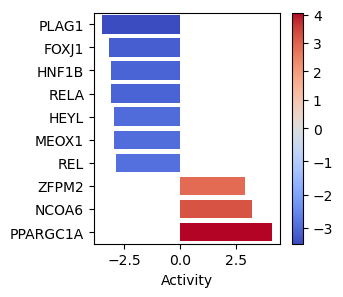

In [37]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=10,
    vertical=True,
    figsize=(3, 3)
)

In [89]:
special_genes = ['NR1I2']

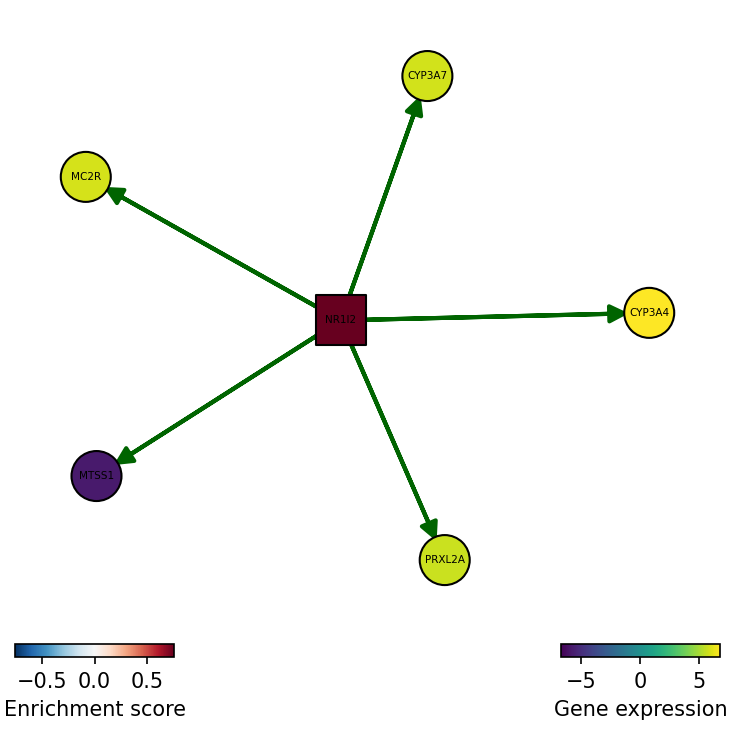

In [164]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=special_genes,
    n_targets=5,
    node_size=50,
    figsize=(5, 5),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_{comparison}_common_prescence_network_TF.jpg'
)

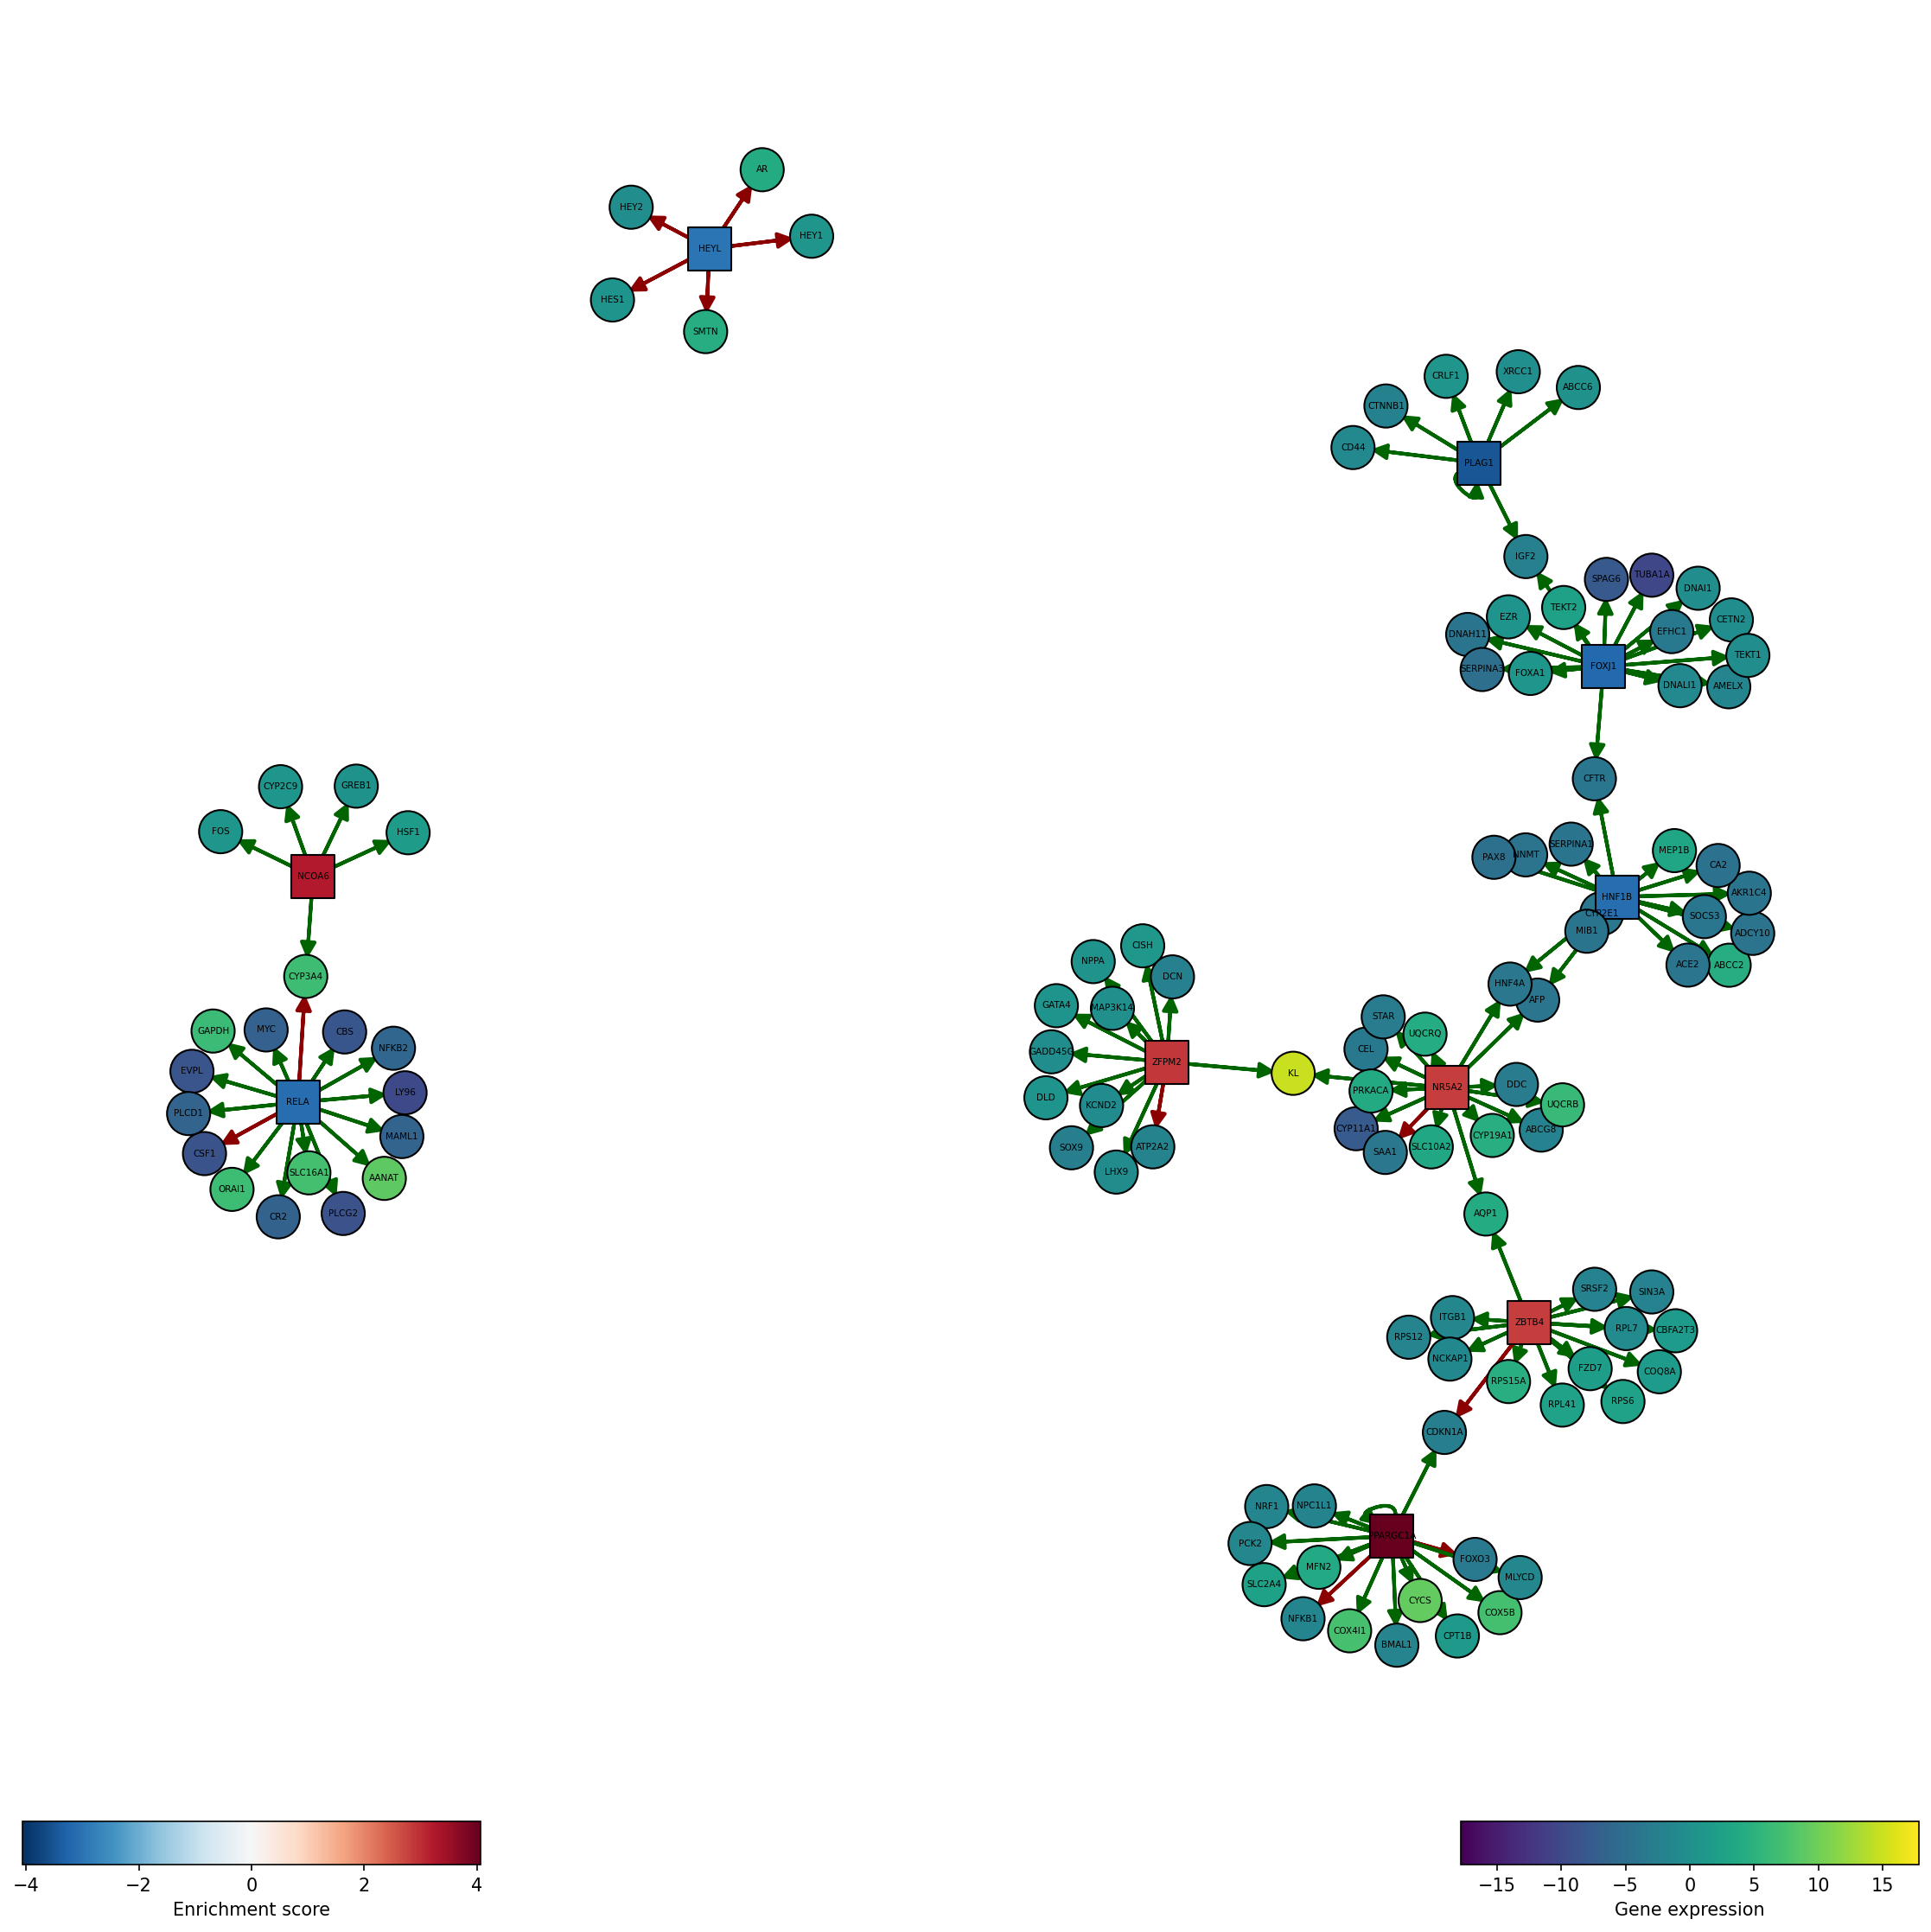

In [43]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=up_down_reg,
    n_targets=15,
    node_size=50,
    figsize=(15, 15),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_{comparison}_network_TF.jpg'
)

In [ ]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': comparison})
pvals = results_df[['padj']].T.rename(index={'padj': comparison})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    comparison,
    name='RELA',
    net=collectri,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5
)

In [107]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny()
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
1395,p53,CCDC150,-3.174527,7.396252e-13
1396,p53,LCE1A,6.154823,8.475458e-13
1397,p53,TREM2,4.101937,9.739648e-13
1398,p53,GDF9,3.355741,1.087433e-12


In [108]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

2 features of mat are empty, they will be removed.
Running mlm on mat with 1 samples and 25376 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
young.vs.old,0.367178,1.113085,0.233406,0.419273,-3.527466,-1.06846,-2.948677,0.617387,0.170698,2.363546,0.178302,0.631986,1.278137,-1.724524


In [109]:
pathway_df = pd.DataFrame(pathway_acts.T)
pathway_df['pvals']=pathway_pvals.T
pathway_df.to_csv(f'results/pathway_acts_{experiment}_{comparison}.csv')
pathway_df

,young.vs.old,pvals
Androgen,0.367178,0.713489
EGFR,1.113085,0.265683
Estrogen,0.233406,0.815448
Hypoxia,0.419273,0.675020
JAK-STAT,-3.527466,0.000420
MAPK,-1.068460,0.285323
NFkB,-2.948677,0.003194
PI3K,0.617387,0.536985
TGFb,0.170698,0.864463
TNFa,2.363546,0.018108


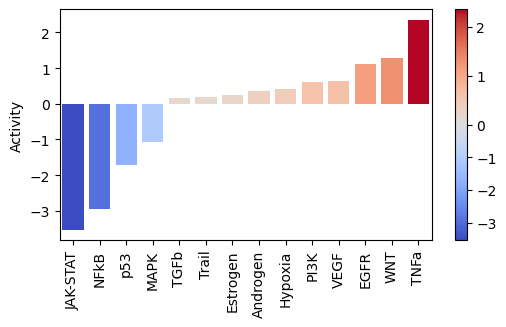

In [110]:
dc.plot_barplot(
    pathway_acts,
    comparison,
    top=25,
    vertical=False,
    figsize=(6, 3)
)

In [ ]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=15)


In [ ]:
dc.plot_targets(results_df, stat='stat', source_name='PI3K', net=progeny, top=15)


In [60]:
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [66]:
# Filter by hallmark
#msigdb_H = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
#msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [111]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,AAACCAC_MIR140,110,0.145455,0.845018,1.0,0.839123,0.141306,BAZ2B;C1orf21;DTNA;EYA2;GYS1;HNRNPH3;KATNBL1;M...
1,AAAGACA_MIR511,204,0.191176,0.334298,1.0,1.087381,1.191467,AGBL3;ATRX;BTG1;BUB3;C1orf21;CAMK2N1;CCNT2;CEP...
2,AAAGGAT_MIR501,127,0.212598,0.179120,1.0,1.214805,2.089099,BCL6;BCLAF1;CELF2;CHODL;CLK1;ERRFI1;H2AX;HOXB8...
3,AAAGGGA_MIR204_MIR211,224,0.156250,0.824404,1.0,0.888295,0.171525,ANKRD13A;AP1S1;ARHGAP29;CCNT2;CCPG1;CHD5;DCAF5...
4,AAANWWTGC_UNKNOWN,194,0.195876,0.280094,1.0,1.114589,1.418461,ANK3;BCL6;BNC2;CACNG3;CDC42EP3;CHD2;DCHS2;DDIT...


In [112]:
enr_pvals.to_csv(f'results/enr_pvals_{experiment}_{comparison}.csv')

In [ ]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.5,
    figsize=(3, 10)
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='TNFA_SIGNALING_VIA_NFKB'
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MYOGENESIS'
)

In [113]:
import liana as ln

liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

,interaction,genes,weight
0,LGALS9&PTPRC,LGALS9,1
1,LGALS9&MET,LGALS9,1
2,LGALS9&CD44,LGALS9,1
3,LGALS9&LRP1,LGALS9,1
4,LGALS9&CD47,LGALS9,1
...,...,...,...
5775,BMP2&ACTR2,ACTR2,1
5776,BMP15&ACTR2,ACTR2,1
5777,CSF1&CSF3R,CSF3R,1
5778,IL36G&IFNAR1,IFNAR1,1


In [114]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

2 features of mat are empty, they will be removed.
Running ulm on mat with 1 samples and 25376 targets for 3680 sources.


In [115]:
lr_df = pd.DataFrame(lr_score.T)
lr_df['pvals']=lr_pvalue.T
lr_df.to_csv(f'results/lr_score_{experiment}_{comparison}.csv')
lr_df

,young.vs.old,pvals
A2M&LRP1,0.554622,0.579158
AANAT&MTNR1B,3.523564,0.000427
ACE&BDKRB2,0.137377,0.890734
ACTR2&ADRB2,-0.038709,0.969123
ACTR2&LDLR,0.428459,0.668321
...,...,...
ZG16B&TLR5,0.053998,0.956937
ZG16B&TLR6,0.371804,0.710042
ZP3&CHRNA7,-0.043678,0.965161
ZP3&EGFR,0.599686,0.548721


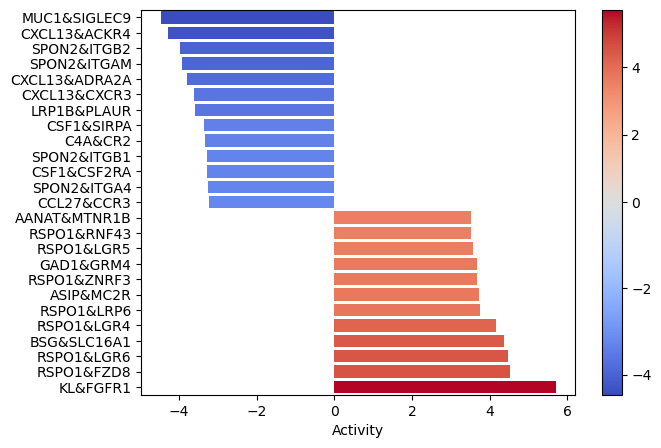

In [116]:
dc.plot_barplot(lr_score, comparison, top=25, vertical=True)


In [1]:
dc.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

NameError: name 'dc' is not defined